In [1]:
import os
import pandas as pd

In [2]:
# Specify the folder containing Parquet files
folder_path = 'C:\\Users\\clair\\MasterThesis\\Feature_selected_data\\'

# List all Parquet files in the folder
parquet_files = [file for file in os.listdir(folder_path) if file.endswith('.parquet')]

# Read each Parquet file into a DataFrame and assign it to a variable
for parquet_file in parquet_files:
    location_name = parquet_file.split('_')[0]  # Extract location name from file name
    file_path = os.path.join(folder_path, parquet_file)
    globals()[f"{location_name}_df"] = pd.read_parquet(file_path)

In [3]:
# Print the first few rows of each DataFrame
print(canyons_df.head())
print(disney_df.head())
print(miami_df.head())
print(vegas_df.head())

# Check the shape of each DataFrame
print(canyons_df.shape)
print(disney_df.shape)
print(miami_df.shape)
print(vegas_df.shape)

  Canyons Ski Resort_STATION_NUM Canyons Ski Resort_STATION_ID  \
0                              4                           SNC   
1                              4                           SNC   
2                              4                           SNC   
3                              4                           SNC   
4                              4                           SNC   

   Canyons Ski Resort_air_temp_set_1  Canyons Ski Resort_wind_speed_set_1  \
0                             8.9825                               0.4675   
1                             7.5175                               0.5150   
2                             6.3575                               0.3375   
3                             5.6200                               0.2925   
4                             6.0650                               0.5600   

   Canyons Ski Resort_solar_radiation_set_1  \
0                                  0.000000   
1                                  0.000000   

# Multiple Regression Model 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import joblib

## Canyons Ski Resort

In [5]:
# Extract features and target variables
X = canyons_df.drop(columns=['Canyons Ski Resort_air_temp_set_1', 'Canyons Ski Resort_wind_speed_set_1', 'Canyons Ski Resort_solar_radiation_set_1', 'Canyons Ski Resort_precip_accum_set_1', 'Canyons Ski Resort_STATION_NUM', 'Canyons Ski Resort_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR'])
y_air_temp = canyons_df['Canyons Ski Resort_air_temp_set_1']
y_wind_speed = canyons_df['Canyons Ski Resort_wind_speed_set_1']
y_solar_radiation = canyons_df['Canyons Ski Resort_solar_radiation_set_1']
y_precip_accum = canyons_df['Canyons Ski Resort_precip_accum_set_1']

# Split the data into training and testing sets (80% train, 20% test)
X_train_air_temp, X_test_air_temp, y_train_air_temp, y_test_air_temp = train_test_split(X, y_air_temp, test_size=0.2, random_state=42)
X_train_wind_speed, X_test_wind_speed, y_train_wind_speed, y_test_wind_speed = train_test_split(X, y_wind_speed, test_size=0.2, random_state=42)
X_train_solar_radiation, X_test_solar_radiation, y_train_solar_radiation, y_test_solar_radiation = train_test_split(X, y_solar_radiation, test_size=0.2, random_state=42)
X_train_precip_accum, X_test_precip_accum, y_train_precip_accum, y_test_precip_accum = train_test_split(X, y_precip_accum, test_size=0.2, random_state=42)

# Build separate models for each target variable
model_air_temp = LinearRegression()
model_wind_speed = LinearRegression()
model_solar_radiation = LinearRegression()
model_precip_accum = LinearRegression()

# Train the models
model_air_temp.fit(X_train_air_temp, y_train_air_temp)
model_wind_speed.fit(X_train_wind_speed, y_train_wind_speed)
model_solar_radiation.fit(X_train_solar_radiation, y_train_solar_radiation)
model_precip_accum.fit(X_train_precip_accum, y_train_precip_accum)

# Save the trained models
joblib.dump(model_air_temp, 'model_air_temp.joblib')
joblib.dump(model_wind_speed, 'model_wind_speed.joblib')
joblib.dump(model_solar_radiation, 'model_solar_radiation.joblib')
joblib.dump(model_precip_accum, 'model_precip_accum.joblib')

# Load the models
loaded_model_air_temp = joblib.load('model_air_temp.joblib')
loaded_model_wind_speed = joblib.load('model_wind_speed.joblib')
loaded_model_solar_radiation = joblib.load('model_solar_radiation.joblib')
loaded_model_precip_accum = joblib.load('model_precip_accum.joblib')

# Make predictions using the loaded models
y_pred_air_temp = loaded_model_air_temp.predict(X_test_air_temp)
y_pred_wind_speed = loaded_model_wind_speed.predict(X_test_wind_speed)
y_pred_solar_radiation = loaded_model_solar_radiation.predict(X_test_solar_radiation)
y_pred_precip_accum = loaded_model_precip_accum.predict(X_test_precip_accum)

# Evaluate each model separately
print('Air Temp - Mean Absolute Error:', metrics.mean_absolute_error(y_test_air_temp, y_pred_air_temp))
print('Wind Speed - Mean Absolute Error:', metrics.mean_absolute_error(y_test_wind_speed, y_pred_wind_speed))
print('Solar Radiation - Mean Absolute Error:', metrics.mean_absolute_error(y_test_solar_radiation, y_pred_solar_radiation))
print('Precip Accum - Mean Absolute Error:', metrics.mean_absolute_error(y_test_precip_accum, y_pred_precip_accum))

Air Temp - Mean Absolute Error: 2.6822156452241206
Wind Speed - Mean Absolute Error: 0.20909549577255662
Solar Radiation - Mean Absolute Error: 106.90345662434609
Precip Accum - Mean Absolute Error: 3.382688076567687


In [6]:
def evaluate_regression_metrics(y_true, y_pred, variable_name):

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'{variable_name} - Root Mean Squared Error: {rmse:.4f}')

    # R-squared
    r2 = r2_score(y_true, y_pred)
    print(f'{variable_name} - R-squared: {r2:.4f}')

# Load models
loaded_model_air_temp = joblib.load('model_air_temp.joblib')
loaded_model_wind_speed = joblib.load('model_wind_speed.joblib')
loaded_model_solar_radiation = joblib.load('model_solar_radiation.joblib')
loaded_model_precip_accum = joblib.load('model_precip_accum.joblib')

# Use loaded models for predictions
y_pred_air_temp = loaded_model_air_temp.predict(X_test_air_temp)
y_pred_wind_speed = loaded_model_wind_speed.predict(X_test_wind_speed)
y_pred_solar_radiation = loaded_model_solar_radiation.predict(X_test_solar_radiation)
y_pred_precip_accum = loaded_model_precip_accum.predict(X_test_precip_accum)

# Evaluate each model separately
evaluate_regression_metrics(y_test_air_temp, y_pred_air_temp, 'Air Temperature')
evaluate_regression_metrics(y_test_wind_speed, y_pred_wind_speed, 'Wind Speed')
evaluate_regression_metrics(y_test_solar_radiation, y_pred_solar_radiation, 'Solar Radiation')
evaluate_regression_metrics(y_test_precip_accum, y_pred_precip_accum, 'Precip Accum')

Air Temperature - Root Mean Squared Error: 3.5101
Air Temperature - R-squared: 0.6376
Wind Speed - Root Mean Squared Error: 0.3140
Wind Speed - R-squared: 0.9253
Solar Radiation - Root Mean Squared Error: 136.9451
Solar Radiation - R-squared: 0.4060
Precip Accum - Root Mean Squared Error: 3.9577
Precip Accum - R-squared: 0.4770


## Make predicitons using the trained model for year 2023

In [7]:
import pandas as pd

# Assuming canyons_df has separate columns 'YEAR', 'MONTH', 'DAY', 'HOUR'
canyons_df['datetime'] = pd.to_datetime(canyons_df[['YEAR', 'MONTH', 'DAY', 'HOUR']])

# Extract features for the year 2023
X_2023 = canyons_df[canyons_df['YEAR'] == 2023].drop(columns=['Canyons Ski Resort_air_temp_set_1', 'Canyons Ski Resort_wind_speed_set_1', 'Canyons Ski Resort_solar_radiation_set_1', 'Canyons Ski Resort_precip_accum_set_1', 'Canyons Ski Resort_STATION_NUM', 'Canyons Ski Resort_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'datetime'])

# Use loaded models for predictions
y_pred_air_temp_2023 = loaded_model_air_temp.predict(X_2023)
y_pred_wind_speed_2023 = loaded_model_wind_speed.predict(X_2023)
y_pred_solar_radiation_2023 = loaded_model_solar_radiation.predict(X_2023)
y_pred_precip_accum_2023 = loaded_model_precip_accum.predict(X_2023)

# Create a DataFrame for predictions
predictions_df = pd.DataFrame({
    'datetime': canyons_df.loc[canyons_df['YEAR'] == 2023, 'datetime'],
    'air_temp_pred': y_pred_air_temp_2023,
    'wind_speed_pred': y_pred_wind_speed_2023,
    'solar_radiation_pred': y_pred_solar_radiation_2023,
    'precip_accum_pred': y_pred_precip_accum_2023
})

# Merge the actual values from canyons_df with the predictions_df
predictions_df = pd.merge(predictions_df, canyons_df[canyons_df['YEAR'] == 2023][[
    'datetime', 'Canyons Ski Resort_air_temp_set_1', 'Canyons Ski Resort_wind_speed_set_1',
    'Canyons Ski Resort_solar_radiation_set_1', 'Canyons Ski Resort_precip_accum_set_1'
]], on='datetime', how='left')

# Rename the actual columns for clarity
predictions_df.rename(columns={
    'Canyons Ski Resort_air_temp_set_1': 'air_temp_actual',
    'Canyons Ski Resort_wind_speed_set_1': 'wind_speed_actual',
    'Canyons Ski Resort_solar_radiation_set_1': 'solar_radiation_actual',
    'Canyons Ski Resort_precip_accum_set_1': 'precip_accum_actual'
}, inplace=True)

In [8]:
predictions_df.head(50)

,datetime,air_temp_pred,wind_speed_pred,solar_radiation_pred,precip_accum_pred,air_temp_actual,wind_speed_actual,solar_radiation_actual,precip_accum_actual
0,2023-06-01 08:00:00,8.734835,1.39505,169.788504,272.185741,9.704667,1.788333,0.0,263.652
1,2023-06-01 08:00:00,8.734835,1.39505,169.788504,272.185741,9.286167,1.502833,0.0,263.652
2,2023-06-01 08:00:00,8.734835,1.39505,169.788504,272.185741,9.286167,1.502833,0.0,263.652
3,2023-06-01 08:00:00,8.734835,1.39505,169.788504,272.185741,9.286167,1.502833,0.0,263.652
4,2023-06-01 08:00:00,8.734835,1.39505,169.788504,272.185741,9.286167,1.502833,0.0,263.652
5,2023-06-01 08:00:00,8.734835,1.39505,169.788504,272.185741,9.286167,1.502833,0.0,263.652
6,2023-06-01 08:00:00,8.734835,1.39505,169.788504,272.185741,9.286167,1.502833,0.0,263.652
7,2023-06-01 08:00:00,8.734835,1.39505,169.788504,272.185741,9.286167,1.502833,0.0,263.652
8,2023-06-01 08:00:00,8.734835,1.39505,169.788504,272.185741,9.286167,1.502833,0.0,263.652
9,2023-06-01 08:00:00,8.734835,1.39505,169.788504,272.185741,9.286167,1.502833,0.0,263.652


In [9]:
# Convert 'datetime' to datetime type (if not already)
predictions_df['datetime'] = pd.to_datetime(predictions_df['datetime'])

# Aggregate the data by taking the mean for duplicated entries
predictions_df_aggregated = predictions_df.groupby('datetime').mean().reset_index()

# Display the aggregated DataFrame
print(predictions_df_aggregated)

               datetime  air_temp_pred  wind_speed_pred  solar_radiation_pred  \
0   2023-06-01 08:00:00       8.455099         1.249843            136.093627   
1   2023-06-01 09:00:00       6.854167         1.219195             94.224187   
2   2023-06-01 10:00:00       6.323552         0.998428             61.483198   
3   2023-06-01 11:00:00       5.907660         0.990099             56.468014   
4   2023-06-01 12:00:00       5.158012         0.968301             74.350421   
..                  ...            ...              ...                   ...   
325 2023-06-30 14:00:00       9.974089         2.039279            135.908838   
326 2023-06-30 15:00:00      10.782311         1.895516            145.071835   
327 2023-06-30 16:00:00      11.729221         2.453441            142.832262   
328 2023-06-30 17:00:00      12.562458         2.883079            156.810853   
329 2023-06-30 18:00:00      12.340136         2.902956            156.345112   

     precip_accum_pred  air

In [10]:
predictions_df_aggregated.head(50)

,datetime,air_temp_pred,wind_speed_pred,solar_radiation_pred,precip_accum_pred,air_temp_actual,wind_speed_actual,solar_radiation_actual,precip_accum_actual
0,2023-06-01 08:00:00,8.455099,1.249843,136.093627,269.727913,9.288614,1.504503,0.000000,263.652
1,2023-06-01 09:00:00,6.854167,1.219195,94.224187,269.410159,7.062446,1.399819,0.000000,263.652
2,2023-06-01 10:00:00,6.323552,0.998428,61.483198,268.797227,6.456105,1.083165,0.001694,263.652
3,2023-06-01 11:00:00,5.907660,0.990099,56.468014,268.684204,6.059122,1.043151,0.133014,263.652
4,2023-06-01 12:00:00,5.158012,0.968301,74.350421,269.102489,5.581948,1.044026,15.434694,263.652
5,2023-06-01 13:00:00,5.640560,0.740902,89.942949,268.957949,6.995379,0.560710,78.435833,263.652
6,2023-06-01 14:00:00,8.907742,0.979163,128.286172,268.296257,10.895709,0.703440,174.188889,263.652
7,2023-06-01 15:00:00,11.919842,1.201824,187.091703,268.121886,14.212276,1.134987,297.696944,263.652
8,2023-06-01 16:00:00,14.015096,1.569183,229.972377,268.075107,16.287340,1.368486,385.426806,263.652
9,2023-06-01 17:00:00,15.207593,1.993574,274.150209,268.485064,17.756755,2.124898,458.940278,263.652


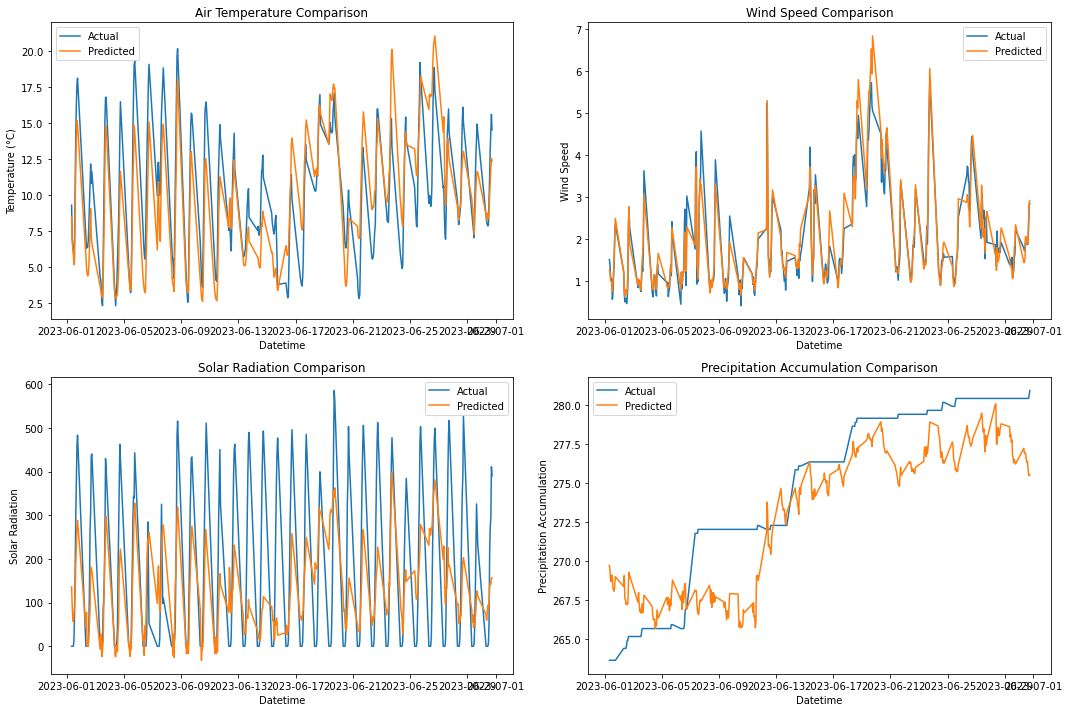

In [11]:
# Convert 'datetime' to numpy array
datetime_values = predictions_df_aggregated['datetime'].values.astype('datetime64[ns]')

# Convert variables to numpy arrays
air_temp_actual_values = predictions_df_aggregated['air_temp_actual'].values
air_temp_pred_values = predictions_df_aggregated['air_temp_pred'].values

wind_speed_actual_values = predictions_df_aggregated['wind_speed_actual'].values
wind_speed_pred_values = predictions_df_aggregated['wind_speed_pred'].values

solar_radiation_actual_values = predictions_df_aggregated['solar_radiation_actual'].values
solar_radiation_pred_values = predictions_df_aggregated['solar_radiation_pred'].values

precip_accum_actual_values = predictions_df_aggregated['precip_accum_actual'].values
precip_accum_pred_values = predictions_df_aggregated['precip_accum_pred'].values

# Plot all variables in one figure
plt.figure(figsize=(15, 10))

# Plot for Air Temperature
plt.subplot(221)
plt.plot(datetime_values, air_temp_actual_values, label='Actual')
plt.plot(datetime_values, air_temp_pred_values, label='Predicted')
plt.title('Air Temperature Comparison')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.legend()

# Plot for Wind Speed
plt.subplot(222)
plt.plot(datetime_values, wind_speed_actual_values, label='Actual')
plt.plot(datetime_values, wind_speed_pred_values, label='Predicted')
plt.title('Wind Speed Comparison')
plt.xlabel('Datetime')
plt.ylabel('Wind Speed')
plt.legend()

# Plot for Solar Radiation
plt.subplot(223)
plt.plot(datetime_values, solar_radiation_actual_values, label='Actual')
plt.plot(datetime_values, solar_radiation_pred_values, label='Predicted')
plt.title('Solar Radiation Comparison')
plt.xlabel('Datetime')
plt.ylabel('Solar Radiation')
plt.legend()

# Plot for Precipitation Accumulation
plt.subplot(224)
plt.plot(datetime_values, precip_accum_actual_values, label='Actual')
plt.plot(datetime_values, precip_accum_pred_values, label='Predicted')
plt.title('Precipitation Accumulation Comparison')
plt.xlabel('Datetime')
plt.ylabel('Precipitation Accumulation')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Las Vegas Data

In [12]:
# Extract features and target variables
X_vegas = vegas_df.drop(columns=['Las Vegas_air_temp_set_1', 'Las Vegas_wind_speed_set_1', 'Las Vegas_solar_radiation_set_1', 'Las Vegas_precip_accum_set_1', 'Las Vegas_STATION_NUM', 'Las Vegas_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR'])
y_air_temp_vegas = vegas_df['Las Vegas_air_temp_set_1']
y_wind_speed_vegas = vegas_df['Las Vegas_wind_speed_set_1']
y_solar_radiation_vegas = vegas_df['Las Vegas_solar_radiation_set_1']
y_precip_accum_vegas = vegas_df['Las Vegas_precip_accum_set_1']

# Split the data into training and testing sets (80% train, 20% test)
X_train_air_temp_vegas, X_test_air_temp_vegas, y_train_air_temp_vegas, y_test_air_temp_vegas = train_test_split(X_vegas, y_air_temp_vegas, test_size=0.2, random_state=42)
X_train_wind_speed_vegas, X_test_wind_speed_vegas, y_train_wind_speed_vegas, y_test_wind_speed_vegas = train_test_split(X_vegas, y_wind_speed_vegas, test_size=0.2, random_state=42)
X_train_solar_radiation_vegas, X_test_solar_radiation_vegas, y_train_solar_radiation_vegas, y_test_solar_radiation_vegas = train_test_split(X_vegas, y_solar_radiation_vegas, test_size=0.2, random_state=42)
X_train_precip_accum_vegas, X_test_precip_accum_vegas, y_train_precip_accum_vegas, y_test_precip_accum_vegas = train_test_split(X_vegas, y_precip_accum_vegas, test_size=0.2, random_state=42)

# Build separate models for each target variable
model_air_temp_vegas = LinearRegression()
model_wind_speed_vegas = LinearRegression()
model_solar_radiation_vegas = LinearRegression()
model_precip_accum_vegas = LinearRegression()

# Train the models
model_air_temp_vegas.fit(X_train_air_temp_vegas, y_train_air_temp_vegas)
model_wind_speed_vegas.fit(X_train_wind_speed_vegas, y_train_wind_speed_vegas)
model_solar_radiation_vegas.fit(X_train_solar_radiation_vegas, y_train_solar_radiation_vegas)
model_precip_accum_vegas.fit(X_train_precip_accum_vegas, y_train_precip_accum_vegas)

# Save the trained models
joblib.dump(model_air_temp_vegas, 'model_air_temp_vegas.joblib')
joblib.dump(model_wind_speed_vegas, 'model_wind_speed_vegas.joblib')
joblib.dump(model_solar_radiation_vegas, 'model_solar_radiation_vegas.joblib')
joblib.dump(model_precip_accum_vegas, 'model_precip_accum_vegas.joblib')

# Load the models
loaded_model_air_temp_vegas = joblib.load('model_air_temp_vegas.joblib')
loaded_model_wind_speed_vegas = joblib.load('model_wind_speed_vegas.joblib')
loaded_model_solar_radiation_vegas = joblib.load('model_solar_radiation_vegas.joblib')
loaded_model_precip_accum_vegas = joblib.load('model_precip_accum_vegas.joblib')

# Make predictions using the loaded models
y_pred_air_temp_vegas = loaded_model_air_temp_vegas.predict(X_test_air_temp_vegas)
y_pred_wind_speed_vegas = loaded_model_wind_speed_vegas.predict(X_test_wind_speed_vegas)
y_pred_solar_radiation_vegas = loaded_model_solar_radiation_vegas.predict(X_test_solar_radiation_vegas)
y_pred_precip_accum_vegas = loaded_model_precip_accum_vegas.predict(X_test_precip_accum_vegas)

# Evaluate each model separately
print('Air Temp - Mean Absolute Error:', metrics.mean_absolute_error(y_test_air_temp_vegas, y_pred_air_temp_vegas))
print('Wind Speed - Mean Absolute Error:', metrics.mean_absolute_error(y_test_wind_speed_vegas, y_pred_wind_speed_vegas))
print('Solar Radiation - Mean Absolute Error:', metrics.mean_absolute_error(y_test_solar_radiation_vegas, y_pred_solar_radiation_vegas))
print('Precip Accum - Mean Absolute Error:', metrics.mean_absolute_error(y_test_precip_accum_vegas, y_pred_precip_accum_vegas))

Air Temp - Mean Absolute Error: 2.83794080545498
Wind Speed - Mean Absolute Error: 0.6244200836744945
Solar Radiation - Mean Absolute Error: 0.4389092190994988
Precip Accum - Mean Absolute Error: 42.86624621305687


In [13]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_regression_metrics(y_true, y_pred, variable_name):

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'{variable_name} - Root Mean Squared Error: {rmse:.4f}')

    # R-squared (R2)
    r2 = r2_score(y_true, y_pred)
    print(f'{variable_name} - R-squared: {r2:.4f}')

# Use loaded models for predictions
y_pred_air_temp_vegas = loaded_model_air_temp_vegas.predict(X_test_air_temp_vegas)
y_pred_wind_speed_vegas = loaded_model_wind_speed_vegas.predict(X_test_wind_speed_vegas)
y_pred_solar_radiation_vegas = loaded_model_solar_radiation_vegas.predict(X_test_solar_radiation_vegas)
y_pred_precip_accum_vegas = loaded_model_precip_accum_vegas.predict(X_test_precip_accum_vegas)

# Evaluate each model separately
evaluate_regression_metrics(y_test_air_temp_vegas, y_pred_air_temp_vegas, 'Air Temperature')
evaluate_regression_metrics(y_test_wind_speed_vegas, y_pred_wind_speed_vegas, 'Wind Speed')
evaluate_regression_metrics(y_test_solar_radiation_vegas, y_pred_solar_radiation_vegas, 'Solar Radiation')
evaluate_regression_metrics(y_test_precip_accum_vegas, y_pred_precip_accum_vegas, 'Precip Accum')

Air Temperature - Root Mean Squared Error: 3.6638
Air Temperature - R-squared: 0.0706
Wind Speed - Root Mean Squared Error: 0.8202
Wind Speed - R-squared: 0.2634
Solar Radiation - Root Mean Squared Error: 1.1142
Solar Radiation - R-squared: 0.9992
Precip Accum - Root Mean Squared Error: 74.5017
Precip Accum - R-squared: 0.0800


## Make predicitons using the trained model for year 2023

In [14]:
# Assuming vegas_df has separate columns 'YEAR', 'MONTH', 'DAY', 'HOUR'
vegas_df['datetime'] = pd.to_datetime(vegas_df[['YEAR', 'MONTH', 'DAY', 'HOUR']])

# Extract features for the year 2023
X_2023_vegas = vegas_df[vegas_df['YEAR'] == 2023].drop(columns=['Las Vegas_air_temp_set_1', 'Las Vegas_wind_speed_set_1', 'Las Vegas_solar_radiation_set_1', 'Las Vegas_precip_accum_set_1', 'Las Vegas_STATION_NUM', 'Las Vegas_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'datetime'])

# Use loaded models for predictions
y_pred_air_temp_2023_vegas = loaded_model_air_temp_vegas.predict(X_2023_vegas)
y_pred_wind_speed_2023_vegas = loaded_model_wind_speed_vegas.predict(X_2023_vegas)
y_pred_solar_radiation_2023_vegas = loaded_model_solar_radiation_vegas.predict(X_2023_vegas)
y_pred_precip_accum_2023_vegas = loaded_model_precip_accum_vegas.predict(X_2023_vegas)

# Create a DataFrame for predictions
predictions_df_vegas = pd.DataFrame({
    'datetime': vegas_df.loc[vegas_df['YEAR'] == 2023, 'datetime'],
    'air_temp_pred': y_pred_air_temp_2023_vegas,
    'wind_speed_pred': y_pred_wind_speed_2023_vegas,
    'solar_radiation_pred': y_pred_solar_radiation_2023_vegas,
    'precip_accum_pred': y_pred_precip_accum_2023_vegas
})

# Merge the actual values from vegas_df with the predictions_df
predictions_df_vegas = pd.merge(predictions_df_vegas, vegas_df[vegas_df['YEAR'] == 2023][[
    'datetime', 'Las Vegas_air_temp_set_1', 'Las Vegas_wind_speed_set_1',
    'Las Vegas_solar_radiation_set_1', 'Las Vegas_precip_accum_set_1'
]], on='datetime', how='left')

# Rename the actual columns for clarity
predictions_df_vegas.rename(columns={
    'Las Vegas_air_temp_set_1': 'air_temp_actual',
    'Las Vegas_wind_speed_set_1': 'wind_speed_actual',
    'Las Vegas_solar_radiation_set_1': 'solar_radiation_actual',
    'Las Vegas_precip_accum_set_1': 'precip_accum_actual'
}, inplace=True)


In [15]:
# Assuming your DataFrame is predictions_df
# Convert 'datetime' to datetime type (if not already)
predictions_df_vegas['datetime'] = pd.to_datetime(predictions_df_vegas['datetime'])

# Aggregate the data by taking the mean for duplicated entries
predictions_df_vegas_aggregated = predictions_df_vegas.groupby('datetime').mean().reset_index()

# Display the aggregated DataFrame
print(predictions_df_vegas_aggregated)

               datetime  air_temp_pred  wind_speed_pred  solar_radiation_pred  \
0   2023-06-01 08:00:00      17.491015         1.020775            185.368933   
1   2023-06-01 09:00:00      17.288259         0.954558            185.297523   
2   2023-06-01 10:00:00      17.204144         1.267849            185.336629   
3   2023-06-01 11:00:00      16.973644         0.942566            185.205431   
4   2023-06-01 12:00:00      16.922482         0.876559            185.174576   
..                  ...            ...              ...                   ...   
325 2023-06-30 14:00:00      17.230563         1.299932            251.148273   
326 2023-06-30 15:00:00      17.538178         1.344948            251.253906   
327 2023-06-30 16:00:00      17.655378         1.387796            251.316194   
328 2023-06-30 17:00:00      17.779775         1.145475            251.299893   
329 2023-06-30 18:00:00      17.629154         0.743154            251.108787   

     precip_accum_pred  air

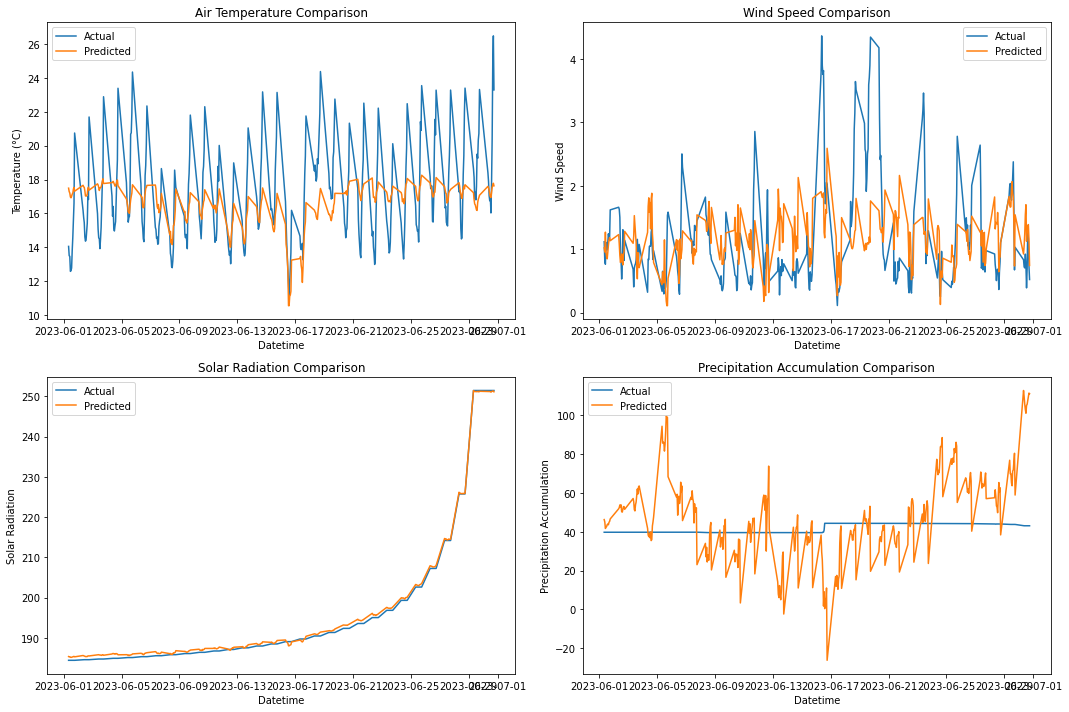

In [16]:
# Convert 'datetime' to numpy array
datetime_values_vegas = predictions_df_vegas_aggregated['datetime'].values.astype('datetime64[ns]')

# Convert variables to numpy arrays
air_temp_actual_values_vegas = predictions_df_vegas_aggregated['air_temp_actual'].values
air_temp_pred_values_vegas = predictions_df_vegas_aggregated['air_temp_pred'].values

wind_speed_actual_values_vegas = predictions_df_vegas_aggregated['wind_speed_actual'].values
wind_speed_pred_values_vegas = predictions_df_vegas_aggregated['wind_speed_pred'].values

solar_radiation_actual_values_vegas = predictions_df_vegas_aggregated['solar_radiation_actual'].values
solar_radiation_pred_values_vegas = predictions_df_vegas_aggregated['solar_radiation_pred'].values

precip_accum_actual_values_vegas = predictions_df_vegas_aggregated['precip_accum_actual'].values
precip_accum_pred_values_vegas = predictions_df_vegas_aggregated['precip_accum_pred'].values

# Plot all variables in one figure
plt.figure(figsize=(15, 10))

# Plot for Air Temperature
plt.subplot(221)
plt.plot(datetime_values_vegas, air_temp_actual_values_vegas, label='Actual')
plt.plot(datetime_values_vegas, air_temp_pred_values_vegas, label='Predicted')
plt.title('Air Temperature Comparison')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.legend()

# Plot for Wind Speed
plt.subplot(222)
plt.plot(datetime_values_vegas, wind_speed_actual_values_vegas, label='Actual')
plt.plot(datetime_values_vegas, wind_speed_pred_values_vegas, label='Predicted')
plt.title('Wind Speed Comparison')
plt.xlabel('Datetime')
plt.ylabel('Wind Speed')
plt.legend()

# Plot for Solar Radiation
plt.subplot(223)
plt.plot(datetime_values_vegas, solar_radiation_actual_values_vegas, label='Actual')
plt.plot(datetime_values_vegas, solar_radiation_pred_values_vegas, label='Predicted')
plt.title('Solar Radiation Comparison')
plt.xlabel('Datetime')
plt.ylabel('Solar Radiation')
plt.legend()

# Plot for Precipitation Accumulation
plt.subplot(224)
plt.plot(datetime_values_vegas, precip_accum_actual_values_vegas, label='Actual')
plt.plot(datetime_values_vegas, precip_accum_pred_values_vegas, label='Predicted')
plt.title('Precipitation Accumulation Comparison')
plt.xlabel('Datetime')
plt.ylabel('Precipitation Accumulation')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Miami Beach Data

In [17]:
# Extract features and target variables
X_miami = miami_df.drop(columns=['Miami Beach_air_temp_set_1', 'Miami Beach_wind_speed_set_1', 'Miami Beach_solar_radiation_set_1', 'Miami Beach_STATION_NUM', 'Miami Beach_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR'])
y_air_temp_miami = miami_df['Miami Beach_air_temp_set_1']
y_wind_speed_miami = miami_df['Miami Beach_wind_speed_set_1']
y_solar_radiation_miami = miami_df['Miami Beach_solar_radiation_set_1']

# Split the data into training and testing sets (80% train, 20% test)
X_train_air_temp_miami, X_test_air_temp_miami, y_train_air_temp_miami, y_test_air_temp_miami = train_test_split(X_miami, y_air_temp_miami, test_size=0.2, random_state=42)
X_train_wind_speed_miami, X_test_wind_speed_miami, y_train_wind_speed_miami, y_test_wind_speed_miami = train_test_split(X_miami, y_wind_speed_miami, test_size=0.2, random_state=42)
X_train_solar_radiation_miami, X_test_solar_radiation_miami, y_train_solar_radiation_miami, y_test_solar_radiation_miami = train_test_split(X_miami, y_solar_radiation_miami, test_size=0.2, random_state=42)

# Build separate models for each target variable
model_air_temp_miami = LinearRegression()
model_wind_speed_miami = LinearRegression()
model_solar_radiation_miami = LinearRegression()

# Train the models
model_air_temp_miami.fit(X_train_air_temp_miami, y_train_air_temp_miami)
model_wind_speed_miami.fit(X_train_wind_speed_miami, y_train_wind_speed_miami)
model_solar_radiation_miami.fit(X_train_solar_radiation_miami, y_train_solar_radiation_miami)

# Save the trained models
joblib.dump(model_air_temp_miami, 'model_air_temp_miami.joblib')
joblib.dump(model_wind_speed_miami, 'model_wind_speed_miami.joblib')
joblib.dump(model_solar_radiation_miami, 'model_solar_radiation_miami.joblib')

# Load the models
loaded_model_air_temp_miami = joblib.load('model_air_temp_miami.joblib')
loaded_model_wind_speed_miami = joblib.load('model_wind_speed_miami.joblib')
loaded_model_solar_radiation_miami = joblib.load('model_solar_radiation_miami.joblib')

# Make predictions using the loaded models
y_pred_air_temp_miami = loaded_model_air_temp_miami.predict(X_test_air_temp_miami)
y_pred_wind_speed_miami = loaded_model_wind_speed_miami.predict(X_test_wind_speed_miami)
y_pred_solar_radiation_miami = loaded_model_solar_radiation_miami.predict(X_test_solar_radiation_miami)

# Evaluate each model separately
print('Air Temp - Mean Absolute Error:', metrics.mean_absolute_error(y_test_air_temp_miami, y_pred_air_temp_miami))
print('Wind Speed - Mean Absolute Error:', metrics.mean_absolute_error(y_test_wind_speed_miami, y_pred_wind_speed_miami))
print('Solar Radiation - Mean Absolute Error:', metrics.mean_absolute_error(y_test_solar_radiation_miami, y_pred_solar_radiation_miami))

Air Temp - Mean Absolute Error: 1.0944625445352039
Wind Speed - Mean Absolute Error: 0.10972840014896053
Solar Radiation - Mean Absolute Error: 123.66265423849616


In [18]:
# Use loaded models for predictions
y_pred_air_temp_miami = loaded_model_air_temp_miami.predict(X_test_air_temp_miami)
y_pred_wind_speed_miami = loaded_model_wind_speed_miami.predict(X_test_wind_speed_miami)
y_pred_solar_radiation_miami = loaded_model_solar_radiation_miami.predict(X_test_solar_radiation_miami)

# Evaluate each model separately
evaluate_regression_metrics(y_test_air_temp_miami, y_pred_air_temp_miami, 'Air Temperature')
evaluate_regression_metrics(y_test_wind_speed_miami, y_pred_wind_speed_miami, 'Wind Speed')
evaluate_regression_metrics(y_test_solar_radiation_miami, y_pred_solar_radiation_miami, 'Solar Radiation')

Air Temperature - Root Mean Squared Error: 1.5532
Air Temperature - R-squared: 0.7088
Wind Speed - Root Mean Squared Error: 0.1439
Wind Speed - R-squared: 0.8631
Solar Radiation - Root Mean Squared Error: 136.5623
Solar Radiation - R-squared: 0.0670


## Make predicitons using the trained model for year 2023

In [19]:
# Assuming vegas_df has separate columns 'YEAR', 'MONTH', 'DAY', 'HOUR'
miami_df['datetime'] = pd.to_datetime(miami_df[['YEAR', 'MONTH', 'DAY', 'HOUR']])

# Extract features for the year 2023
X_2023_miami = miami_df[miami_df['YEAR'] == 2023].drop(columns=['Miami Beach_air_temp_set_1', 'Miami Beach_wind_speed_set_1', 'Miami Beach_solar_radiation_set_1', 'Miami Beach_STATION_NUM', 'Miami Beach_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR','datetime'])

# Use loaded models for predictions
y_pred_air_temp_2023_miami = loaded_model_air_temp_miami.predict(X_2023_miami)
y_pred_wind_speed_2023_miami = loaded_model_wind_speed_miami.predict(X_2023_miami)
y_pred_solar_radiation_2023_miami = loaded_model_solar_radiation_miami.predict(X_2023_miami)

# Create a DataFrame for predictions
predictions_df_miami = pd.DataFrame({
    'datetime': miami_df.loc[miami_df['YEAR'] == 2023, 'datetime'],
    'air_temp_pred': y_pred_air_temp_2023_miami,
    'wind_speed_pred': y_pred_wind_speed_2023_miami,
    'solar_radiation_pred': y_pred_solar_radiation_2023_miami,
})

# Merge the actual values from vegas_df with the predictions_df
predictions_df_miami = pd.merge(predictions_df_miami, miami_df[miami_df['YEAR'] == 2023][[
    'datetime', 'Miami Beach_air_temp_set_1', 'Miami Beach_wind_speed_set_1',
    'Miami Beach_solar_radiation_set_1'
]], on='datetime', how='left')

# Rename the actual columns for clarity
predictions_df_vegas.rename(columns={
    'Miami Beach_air_temp_set_1': 'air_temp_actual',
    'Miami Beach_wind_speed_set_1': 'wind_speed_actual',
    'Miami Beach_solar_radiation_set_1': 'solar_radiation_actual',
}, inplace=True)

In [20]:
# Assuming your DataFrame is predictions_df
# Convert 'datetime' to datetime type (if not already)
predictions_df_miami['datetime'] = pd.to_datetime(predictions_df_miami['datetime'])

# Aggregate the data by taking the mean for duplicated entries
predictions_df_miami_aggregated = predictions_df_miami.groupby('datetime').mean().reset_index()

# Display the aggregated DataFrame
print(predictions_df_miami_aggregated)

               datetime  air_temp_pred  wind_speed_pred  solar_radiation_pred  \
0   2023-06-01 08:00:00      25.524229         0.062555           1339.223428   
1   2023-06-01 09:00:00      25.378169        -0.158246           1394.022569   
2   2023-06-01 10:00:00      25.123333        -0.199867           1354.982582   
3   2023-06-01 11:00:00      25.013664         0.038997           1336.748723   
4   2023-06-01 12:00:00      26.176636        -0.055643           1354.094808   
..                  ...            ...              ...                   ...   
297 2023-06-30 13:00:00      27.510954        -0.015257           1359.489953   
298 2023-06-30 14:00:00      28.075167         0.219870           1347.446790   
299 2023-06-30 15:00:00      26.468243         0.293449           1357.423224   
300 2023-06-30 16:00:00      28.849867         0.216962           1354.272299   
301 2023-06-30 17:00:00      29.614528         0.166387           1364.210747   

     Miami Beach_air_temp_s

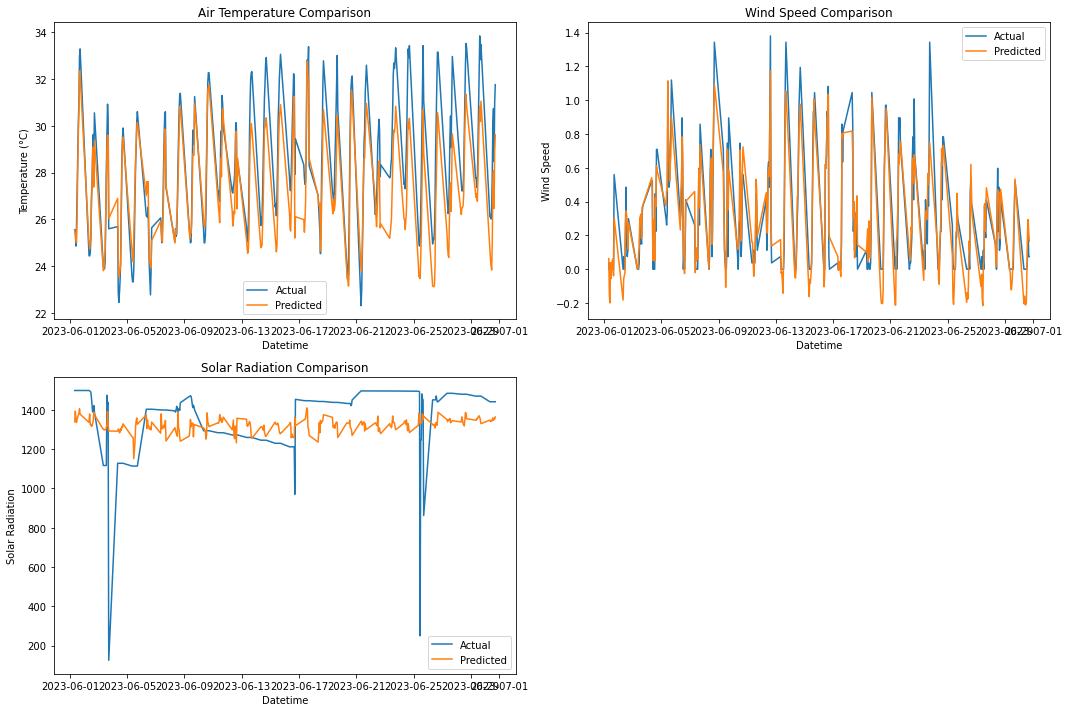

In [22]:
# Convert 'datetime' to numpy array
datetime_values_miami = predictions_df_miami_aggregated['datetime'].values.astype('datetime64[ns]')

# Convert variables to numpy arrays
air_temp_actual_values_miami = predictions_df_miami_aggregated['Miami Beach_air_temp_set_1'].values
air_temp_pred_values_miami = predictions_df_miami_aggregated['air_temp_pred'].values

wind_speed_actual_values_miami = predictions_df_miami_aggregated['Miami Beach_wind_speed_set_1'].values
wind_speed_pred_values_miami = predictions_df_miami_aggregated['wind_speed_pred'].values

solar_radiation_actual_values_miami = predictions_df_miami_aggregated['Miami Beach_solar_radiation_set_1'].values
solar_radiation_pred_values_miami = predictions_df_miami_aggregated['solar_radiation_pred'].values

# Plot all variables in one figure
plt.figure(figsize=(15, 10))

# Plot for Air Temperature
plt.subplot(221)
plt.plot(datetime_values_miami, air_temp_actual_values_miami, label='Actual')
plt.plot(datetime_values_miami, air_temp_pred_values_miami, label='Predicted')
plt.title('Air Temperature Comparison')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.legend()

# Plot for Wind Speed
plt.subplot(222)
plt.plot(datetime_values_miami, wind_speed_actual_values_miami, label='Actual')
plt.plot(datetime_values_miami, wind_speed_pred_values_miami, label='Predicted')
plt.title('Wind Speed Comparison')
plt.xlabel('Datetime')
plt.ylabel('Wind Speed')
plt.legend()

# Plot for Solar Radiation
plt.subplot(223)
plt.plot(datetime_values_miami, solar_radiation_actual_values_miami, label='Actual')
plt.plot(datetime_values_miami, solar_radiation_pred_values_miami, label='Predicted')
plt.title('Solar Radiation Comparison')
plt.xlabel('Datetime')
plt.ylabel('Solar Radiation')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Walt Disney Park & Resort

In [23]:
# Extract features and target variables
X_disney = disney_df.drop(columns=['Walt Disney Parks & Resorts_air_temp_set_1', 'Walt Disney Parks & Resorts_wind_speed_set_1','Walt Disney Parks & Resorts_precip_accum_set_1', 'Walt Disney Parks & Resorts_STATION_NUM', 'Walt Disney Parks & Resorts_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR'])
y_air_temp_disney = disney_df['Walt Disney Parks & Resorts_air_temp_set_1']
y_wind_speed_disney = disney_df['Walt Disney Parks & Resorts_wind_speed_set_1']
y_precip_accum_disney = disney_df['Walt Disney Parks & Resorts_precip_accum_set_1']

# Split the data into training and testing sets (80% train, 20% test)
X_train_air_temp_disney, X_test_air_temp_disney, y_train_air_temp_disney, y_test_air_temp_disney = train_test_split(X_disney, y_air_temp_disney, test_size=0.2, random_state=42)
X_train_wind_speed_disney, X_test_wind_speed_disney, y_train_wind_speed_disney, y_test_wind_speed_disney = train_test_split(X_disney, y_wind_speed_disney, test_size=0.2, random_state=42)
X_train_precip_accum_disney, X_test_precip_accum_disney, y_train_precip_accum_disney, y_test_precip_accum_disney = train_test_split(X_disney, y_precip_accum_disney, test_size=0.2, random_state=42)

# Build separate models for each target variable
model_air_temp_disney = LinearRegression()
model_wind_speed_disney = LinearRegression()
model_precip_accum_disney = LinearRegression()

# Train the models
model_air_temp_disney.fit(X_train_air_temp_disney, y_train_air_temp_disney)
model_wind_speed_disney.fit(X_train_wind_speed_disney, y_train_wind_speed_disney)
model_precip_accum_disney.fit(X_train_precip_accum_disney, y_train_precip_accum_disney)

# Save the trained models
joblib.dump(model_air_temp_disney, 'model_air_temp_disney.joblib')
joblib.dump(model_wind_speed_disney, 'model_wind_speed_disney.joblib')
joblib.dump(model_precip_accum_disney, 'model_precip_accum_disney.joblib')

# Load the models
loaded_model_air_temp_disney = joblib.load('model_air_temp_disney.joblib')
loaded_model_wind_speed_disney = joblib.load('model_wind_speed_disney.joblib')
loaded_model_precip_accum_disney = joblib.load('model_precip_accum_disney.joblib')

# Make predictions using the loaded models
y_pred_air_temp_disney = loaded_model_air_temp_disney.predict(X_test_air_temp_disney)
y_pred_wind_speed_disney = loaded_model_wind_speed_disney.predict(X_test_wind_speed_disney)
y_pred_precip_accum_disney = loaded_model_precip_accum_disney.predict(X_test_precip_accum_disney)

# Evaluate each model separately
print('Air Temp - Mean Absolute Error:', metrics.mean_absolute_error(y_test_air_temp_disney, y_pred_air_temp_disney))
print('Wind Speed - Mean Absolute Error:', metrics.mean_absolute_error(y_test_wind_speed_disney, y_pred_wind_speed_disney))
print('Precip Accum - Mean Absolute Error:', metrics.mean_absolute_error(y_test_precip_accum_disney, y_pred_precip_accum_disney))

Air Temp - Mean Absolute Error: 1.352408119507744
Wind Speed - Mean Absolute Error: 0.4876974913685434
Precip Accum - Mean Absolute Error: 9.230709578925437


In [24]:
# Use loaded models for predictions
y_pred_air_temp_disney = loaded_model_air_temp_disney.predict(X_test_air_temp_disney)
y_pred_wind_speed_disney = loaded_model_wind_speed_disney.predict(X_test_wind_speed_disney)
y_pred_precip_accum_disney = loaded_model_precip_accum_disney.predict(X_test_precip_accum_disney)

# Evaluate each model separately
evaluate_regression_metrics(y_test_air_temp_disney, y_pred_air_temp_disney, 'Air Temperature')
evaluate_regression_metrics(y_test_wind_speed_disney, y_pred_wind_speed_disney, 'Wind Speed')
evaluate_regression_metrics(y_test_precip_accum_disney, y_pred_precip_accum_disney, 'Precip Accum')

Air Temperature - Root Mean Squared Error: 1.8470
Air Temperature - R-squared: 0.7713
Wind Speed - Root Mean Squared Error: 0.6502
Wind Speed - R-squared: 0.3935
Precip Accum - Root Mean Squared Error: 12.0512
Precip Accum - R-squared: 0.3884


In [27]:
# Assuming disney_df has separate columns 'YEAR', 'MONTH', 'DAY', 'HOUR'
disney_df['datetime'] = pd.to_datetime(disney_df[['YEAR', 'MONTH', 'DAY', 'HOUR']])

# Extract features for the year 2023
X_2023_disney = disney_df[disney_df['YEAR'] == 2023].drop(columns=['Walt Disney Parks & Resorts_air_temp_set_1', 'Walt Disney Parks & Resorts_wind_speed_set_1', 'Walt Disney Parks & Resorts_precip_accum_set_1', 'Walt Disney Parks & Resorts_STATION_NUM', 'Walt Disney Parks & Resorts_STATION_ID', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'datetime'])

# Use loaded models for predictions
y_pred_air_temp_2023_disney = loaded_model_air_temp_disney.predict(X_2023_disney)
y_pred_wind_speed_2023_disney = loaded_model_wind_speed_disney.predict(X_2023_disney)
y_pred_precip_accum_2023_disney = loaded_model_precip_accum_disney.predict(X_2023_disney)

# Create a DataFrame for predictions
predictions_df_disney = pd.DataFrame({
    'datetime': disney_df.loc[disney_df['YEAR'] == 2023, 'datetime'],
    'air_temp_pred': y_pred_air_temp_2023_disney,
    'wind_speed_pred': y_pred_wind_speed_2023_disney,
    'precip_accum_pred': y_pred_precip_accum_2023_disney
})

# Merge the actual values from disney_df with the predictions_df
predictions_df_disney = pd.merge(predictions_df_disney, disney_df[disney_df['YEAR'] == 2023][[
    'datetime', 'Walt Disney Parks & Resorts_air_temp_set_1', 'Walt Disney Parks & Resorts_wind_speed_set_1', 'Walt Disney Parks & Resorts_precip_accum_set_1'
]], on='datetime', how='left')

# Rename the actual columns for clarity
predictions_df_disney.rename(columns={
    'Walt Disney Parks & Resorts_air_temp_set_1': 'air_temp_actual',
    'Walt Disney Parks & Resorts_wind_speed_set_1': 'wind_speed_actual',
    'Walt Disney Parks & Resorts_precip_accum_set_1': 'precip_accum_actual'
}, inplace=True)

In [28]:
# Assuming your DataFrame is predictions_df_disney
# Convert 'datetime' to datetime type (if not already)
predictions_df_disney['datetime'] = pd.to_datetime(predictions_df_disney['datetime'])

# Aggregate the data by taking the mean for duplicated entries
predictions_df_disney_aggregated = predictions_df_disney.groupby('datetime').mean().reset_index()

# Display the aggregated DataFrame
print(predictions_df_disney_aggregated)

               datetime  air_temp_pred  wind_speed_pred  precip_accum_pred  \
0   2023-06-01 08:00:00      23.922696         0.679292         100.463911   
1   2023-06-01 09:00:00      23.645179         0.647184         100.459836   
2   2023-06-01 10:00:00      23.463119         0.639608         100.330180   
3   2023-06-01 11:00:00      23.753230         0.618630         100.907891   
4   2023-06-01 12:00:00      25.484734         0.904559         100.480894   
..                  ...            ...              ...                ...   
325 2023-06-30 14:00:00      27.802004         1.519397          93.898279   
326 2023-06-30 15:00:00      29.730641         1.700229          95.686872   
327 2023-06-30 16:00:00      30.787434         1.908706          94.029952   
328 2023-06-30 17:00:00      30.077855         1.772138          94.702211   
329 2023-06-30 18:00:00      25.852694         2.129714          80.507076   

     air_temp_actual  wind_speed_actual  precip_accum_actual  


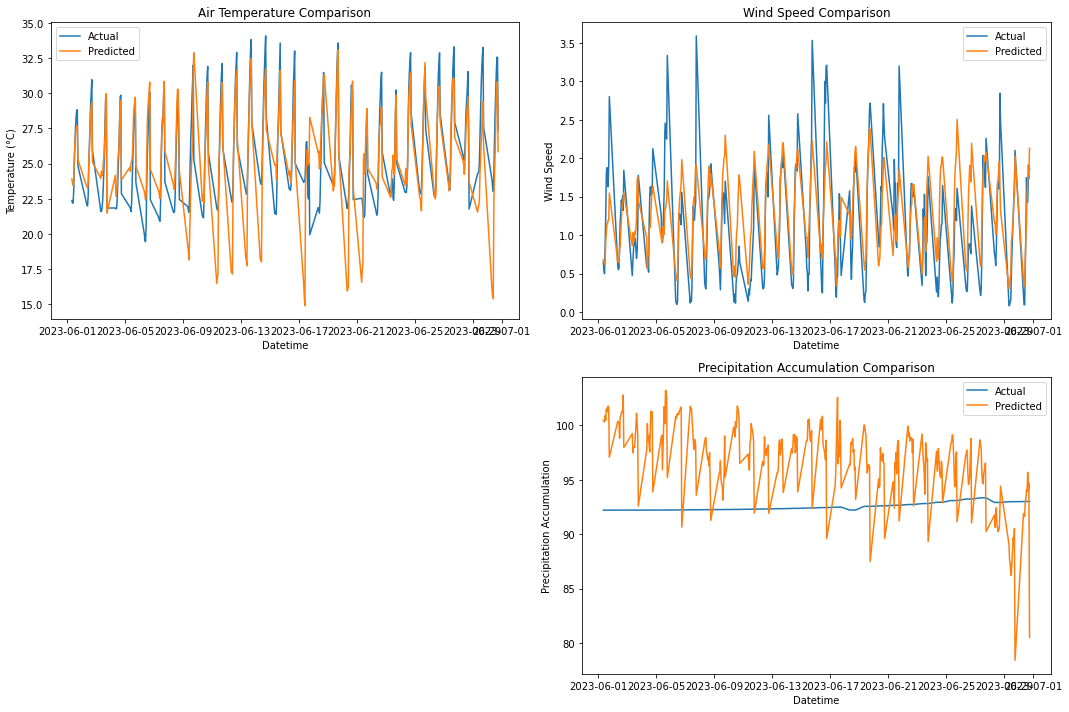

In [29]:
# Convert 'datetime' to numpy array
datetime_values_disney = predictions_df_disney_aggregated['datetime'].values.astype('datetime64[ns]')

# Convert variables to numpy arrays
air_temp_actual_values_disney = predictions_df_disney_aggregated['air_temp_actual'].values
air_temp_pred_values_disney = predictions_df_disney_aggregated['air_temp_pred'].values

wind_speed_actual_values_disney = predictions_df_disney_aggregated['wind_speed_actual'].values
wind_speed_pred_values_disney = predictions_df_disney_aggregated['wind_speed_pred'].values

precip_accum_actual_values_disney = predictions_df_disney_aggregated['precip_accum_actual'].values
precip_accum_pred_values_disney = predictions_df_disney_aggregated['precip_accum_pred'].values

# Plot all variables in one figure
plt.figure(figsize=(15, 10))

# Plot for Air Temperature
plt.subplot(221)
plt.plot(datetime_values_disney, air_temp_actual_values_disney, label='Actual')
plt.plot(datetime_values_disney, air_temp_pred_values_disney, label='Predicted')
plt.title('Air Temperature Comparison')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.legend()

# Plot for Wind Speed
plt.subplot(222)
plt.plot(datetime_values_disney, wind_speed_actual_values_disney, label='Actual')
plt.plot(datetime_values_disney, wind_speed_pred_values_disney, label='Predicted')
plt.title('Wind Speed Comparison')
plt.xlabel('Datetime')
plt.ylabel('Wind Speed')
plt.legend()

# Plot for Precipitation Accumulation
plt.subplot(224)
plt.plot(datetime_values_disney, precip_accum_actual_values_disney, label='Actual')
plt.plot(datetime_values_disney, precip_accum_pred_values_disney, label='Predicted')
plt.title('Precipitation Accumulation Comparison')
plt.xlabel('Datetime')
plt.ylabel('Precipitation Accumulation')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
